<a href="https://colab.research.google.com/github/RaiyaN-98/BCI_MI_Wavelet_CNN/blob/master/MultiBranch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/Shareddrives/Shared with Raiyan/spcup_2022_training_part1.zip"
!unzip -q "/content/drive/Shareddrives/Shared with Raiyan/spcup_2022_unseen.zip"

In [ ]:
# !unzip -q "/content/drive/Shareddrives/Shared with Raiyan/spcup_2022_eval_part1.zip"
!unzip -q "/content/drive/Shareddrives/Shared with Raiyan/spcup_2022_eval_part2.zip"

In [ ]:
import pandas as pd
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
# training_path = "spcup_2022_training_part1/"
# labels = pd.read_csv("spcup_2022_training_part1/labels.csv")
# unseen_path = "spcup_2022_unseen/"
# unseen_labels = pd.read_csv("spcup_2022_unseen/labels.csv")
# eval_path = "spcup_2022_eval_part1"
# eval_labels = pd.read_csv("/content/drive/Shareddrives/Shared with Raiyan/Evaluation results/solutions_eval_part1.csv")
eval_path2 = "spcup_2022_eval_part2"
eval_labels2 = pd.read_csv("/content/drive/Shareddrives/Shared with Raiyan/Evaluation results/solutions_eval_part2.csv")

In [ ]:
import math
def resample(filename):
  audio, sr = librosa.load(filename)
  new_sr = math.ceil(70000*sr/len(audio))
  audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=new_sr)

  D = librosa.stft(audio_resampled)
  H, P = librosa.decompose.hpss(D)
  y_har = librosa.istft(H)
  y_perc = librosa.istft(P)
  
  return [audio_resampled, y_har, y_perc, new_sr]

In [ ]:
def features_extractor(filename, start, finish):
    audio_resampled, y_har, y_perc, sample_rate = resample(filename)
    mfccs_features1 = librosa.feature.mfcc(y=audio_resampled[start:finish], sr=sample_rate, n_mfcc=40, n_fft=2048, hop_length=512)
    mfccs_features2 = librosa.feature.mfcc(y=y_har[start:finish], sr=sample_rate, n_mfcc=40, n_fft=2048, hop_length=512)
    mfccs_features3 = librosa.feature.mfcc(y=y_perc[start:finish], sr=sample_rate, n_mfcc=40, n_fft=2048, hop_length=512)
    return [mfccs_features1.T.tolist(), mfccs_features2.T.tolist(), mfccs_features3.T.tolist()]

In [ ]:
from tqdm import tqdm      
extracted_features=[]
extracted_features_har=[]
extracted_features_perc=[]
extracted_labels=[]
no_of_samples = 70000
def combined_feature_extractor(labels, path):
  cnt = 0
  for index_num,row in tqdm(labels.iterrows()):
      # if cnt > 10:
      #   break
      # cnt += 1
      file_name = os.path.join(os.path.abspath(path),str(row["track"]))
      final_class_labels = row["algorithm"]
      data = features_extractor(file_name, 0, 70000)
      extracted_features.append(data)
      # extracted_features_har.append(data[1])
      # extracted_features_perc.append(data[2])
      extracted_labels.append(final_class_labels)

In [ ]:
combined_feature_extractor(eval_labels2, eval_path2)
# combined_feature_extractor(unseen_labels, unseen_path)

9000it [1:29:30,  1.68it/s]


In [ ]:
extracted_labels

NameError: ignored

In [ ]:
### Split the dataset into independent and dependent dataset
X = np.array(extracted_features)
# X_Har = np.array(extracted_features_har)
# X_Perc = np.array(extracted_features_perc)
y = np.array(extracted_labels)

In [ ]:
np.save("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/X_eval2.npy", X)
np.save("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/y_eval2.npy", y)

In [ ]:
X_test = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/X_eval1.npy")
y_test = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/y_eval1.npy")
X_train = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/X.npy")
y_train = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/y.npy")

In [ ]:
X_test_Noisy = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/X_eval2.npy")
y_test_Noisy = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/y_eval2.npy")

In [ ]:
X_reverb = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/X_reverb.npy")
y_reverb = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/y_reverb.npy")
X_noise = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/X_noise.npy")
y_noise = np.load("/content/drive/Shareddrives/Shared with Raiyan/Multibranch/y_noise.npy")

In [ ]:
# x = np.zeros((1, 3, 137, 40))
x = 0
x = X[:125]
# x = np.append(x, X[1000:1125], axis=0)

In [ ]:
X.shape

(9000, 3, 137, 40)

In [ ]:
X.shape

(9000, 3, 137, 40)

In [ ]:
def split_components(data):
    x1 = []
    x2 = []
    x3 = []
    for i in range(len(data)):
      x1.append(data[i][0])
      x2.append(data[i][1])
      x3.append(data[i][2])

    x1 = np.array(x1)
    x2 = np.array(x2)
    x3 = np.array(x3)

    x1 = x1[..., np.newaxis]
    x2 = x2[..., np.newaxis]
    x3 = x3[..., np.newaxis]

    return [x1, x2, x3]

In [ ]:
def folded_split(X, y, folded_option):
  curr_pos = 0
  curr_pos_unseen = 5000
  X_train = 0
  X_test = 0
  y_train = 0
  y_test = 0
  counter = 0
  for i in folded_option:
    if i == 1:
      X_test = X[curr_pos : curr_pos+1000]
      y_test = y[curr_pos : curr_pos+1000]
      X_test = np.append(X_test, X[curr_pos_unseen : curr_pos_unseen+200], axis=0)
      y_test = np.append(y_test, y[curr_pos_unseen : curr_pos_unseen+200], axis=0)
    else:
      if counter == 0:
        X_train = X[curr_pos : curr_pos+1000]
        y_train = y[curr_pos : curr_pos+1000]
        X_train = np.append(X_train, X[curr_pos_unseen : curr_pos_unseen+200], axis=0)
        y_train = np.append(y_train, y[curr_pos_unseen : curr_pos_unseen+200], axis=0)
        counter = 1
      else:
        X_train = np.append(X_train, X[curr_pos : curr_pos+1000], axis=0)
        y_train = np.append(y_train, y[curr_pos : curr_pos+1000], axis=0)
        X_train = np.append(X_train, X[curr_pos_unseen : curr_pos_unseen+200], axis=0)
        y_train = np.append(y_train, y[curr_pos_unseen : curr_pos_unseen+200], axis=0)
    
    curr_pos += 1000
    curr_pos_unseen += 200
  
  return X_train, X_test, y_train, y_test

In [ ]:
def prepare_datasets(X, y, folded_option, validation_size):
    # create train, validation and test split
    X_train, X_test, y_train, y_test = folded_split(X, y, folded_option)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=0)

    return split_components(X_train), split_components(X_validation), split_components(X_test), y_train, y_validation, y_test

In [ ]:
X_train_noise, X_validation_noise, X_test_noise, y_train_noise, y_validation_noise, y_test_noise = prepare_datasets(X_noise, y_noise, [0, 0, 0, 1, 0], 0.2)
X_train_reverb, X_validation_reverb, X_test_reverb, y_train_reverb, y_validation_reverb, y_test_reverb = prepare_datasets(X_reverb, y_reverb, [0, 0, 0, 1, 0], 0.2)

In [ ]:
X_train = split_components(X_train)
X_test = split_components(X_test)

In [ ]:
X_test_Noisy = split_components(X_test_Noisy)

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [ ]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 4th conv layer
    model.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 5th conv layer
    model.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 6th conv layer
    model.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 7th conv layer
    model.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 8th conv layer
    model.add(keras.layers.Conv2D(512, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    #model.add(keras.layers.Dropout(0.3))

    # output layer
    #model.add(keras.layers.Dense(6, activation='softmax'))

    return model

In [ ]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(X, y, [0, 0, 0, 1, 0], 0.2)

In [ ]:
len(X_train)

3

In [ ]:
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model


# create network
input_shape = (X_train[0].shape[1], X_train[0].shape[2], 1)
print(input_shape)
modelTotal = build_model(input_shape)
modelHar = build_model(input_shape)
modelPerc = build_model(input_shape)

# combine models
combinedInput = concatenate([modelTotal.output, modelHar.output, modelPerc.output])

x = keras.layers.Dense(512, activation="relu")(combinedInput)
x = keras.layers.Dense(6, activation="softmax")(x)

model = Model(inputs=[modelTotal.input, modelHar.input, modelPerc.input], outputs=x)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

(137, 40, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_input (InputLayer)      [(None, 137, 40, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_8_input (InputLayer)    [(None, 137, 40, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_16_input (InputLayer)   [(None, 137, 40, 1)  0           []                               
                                ]                                                

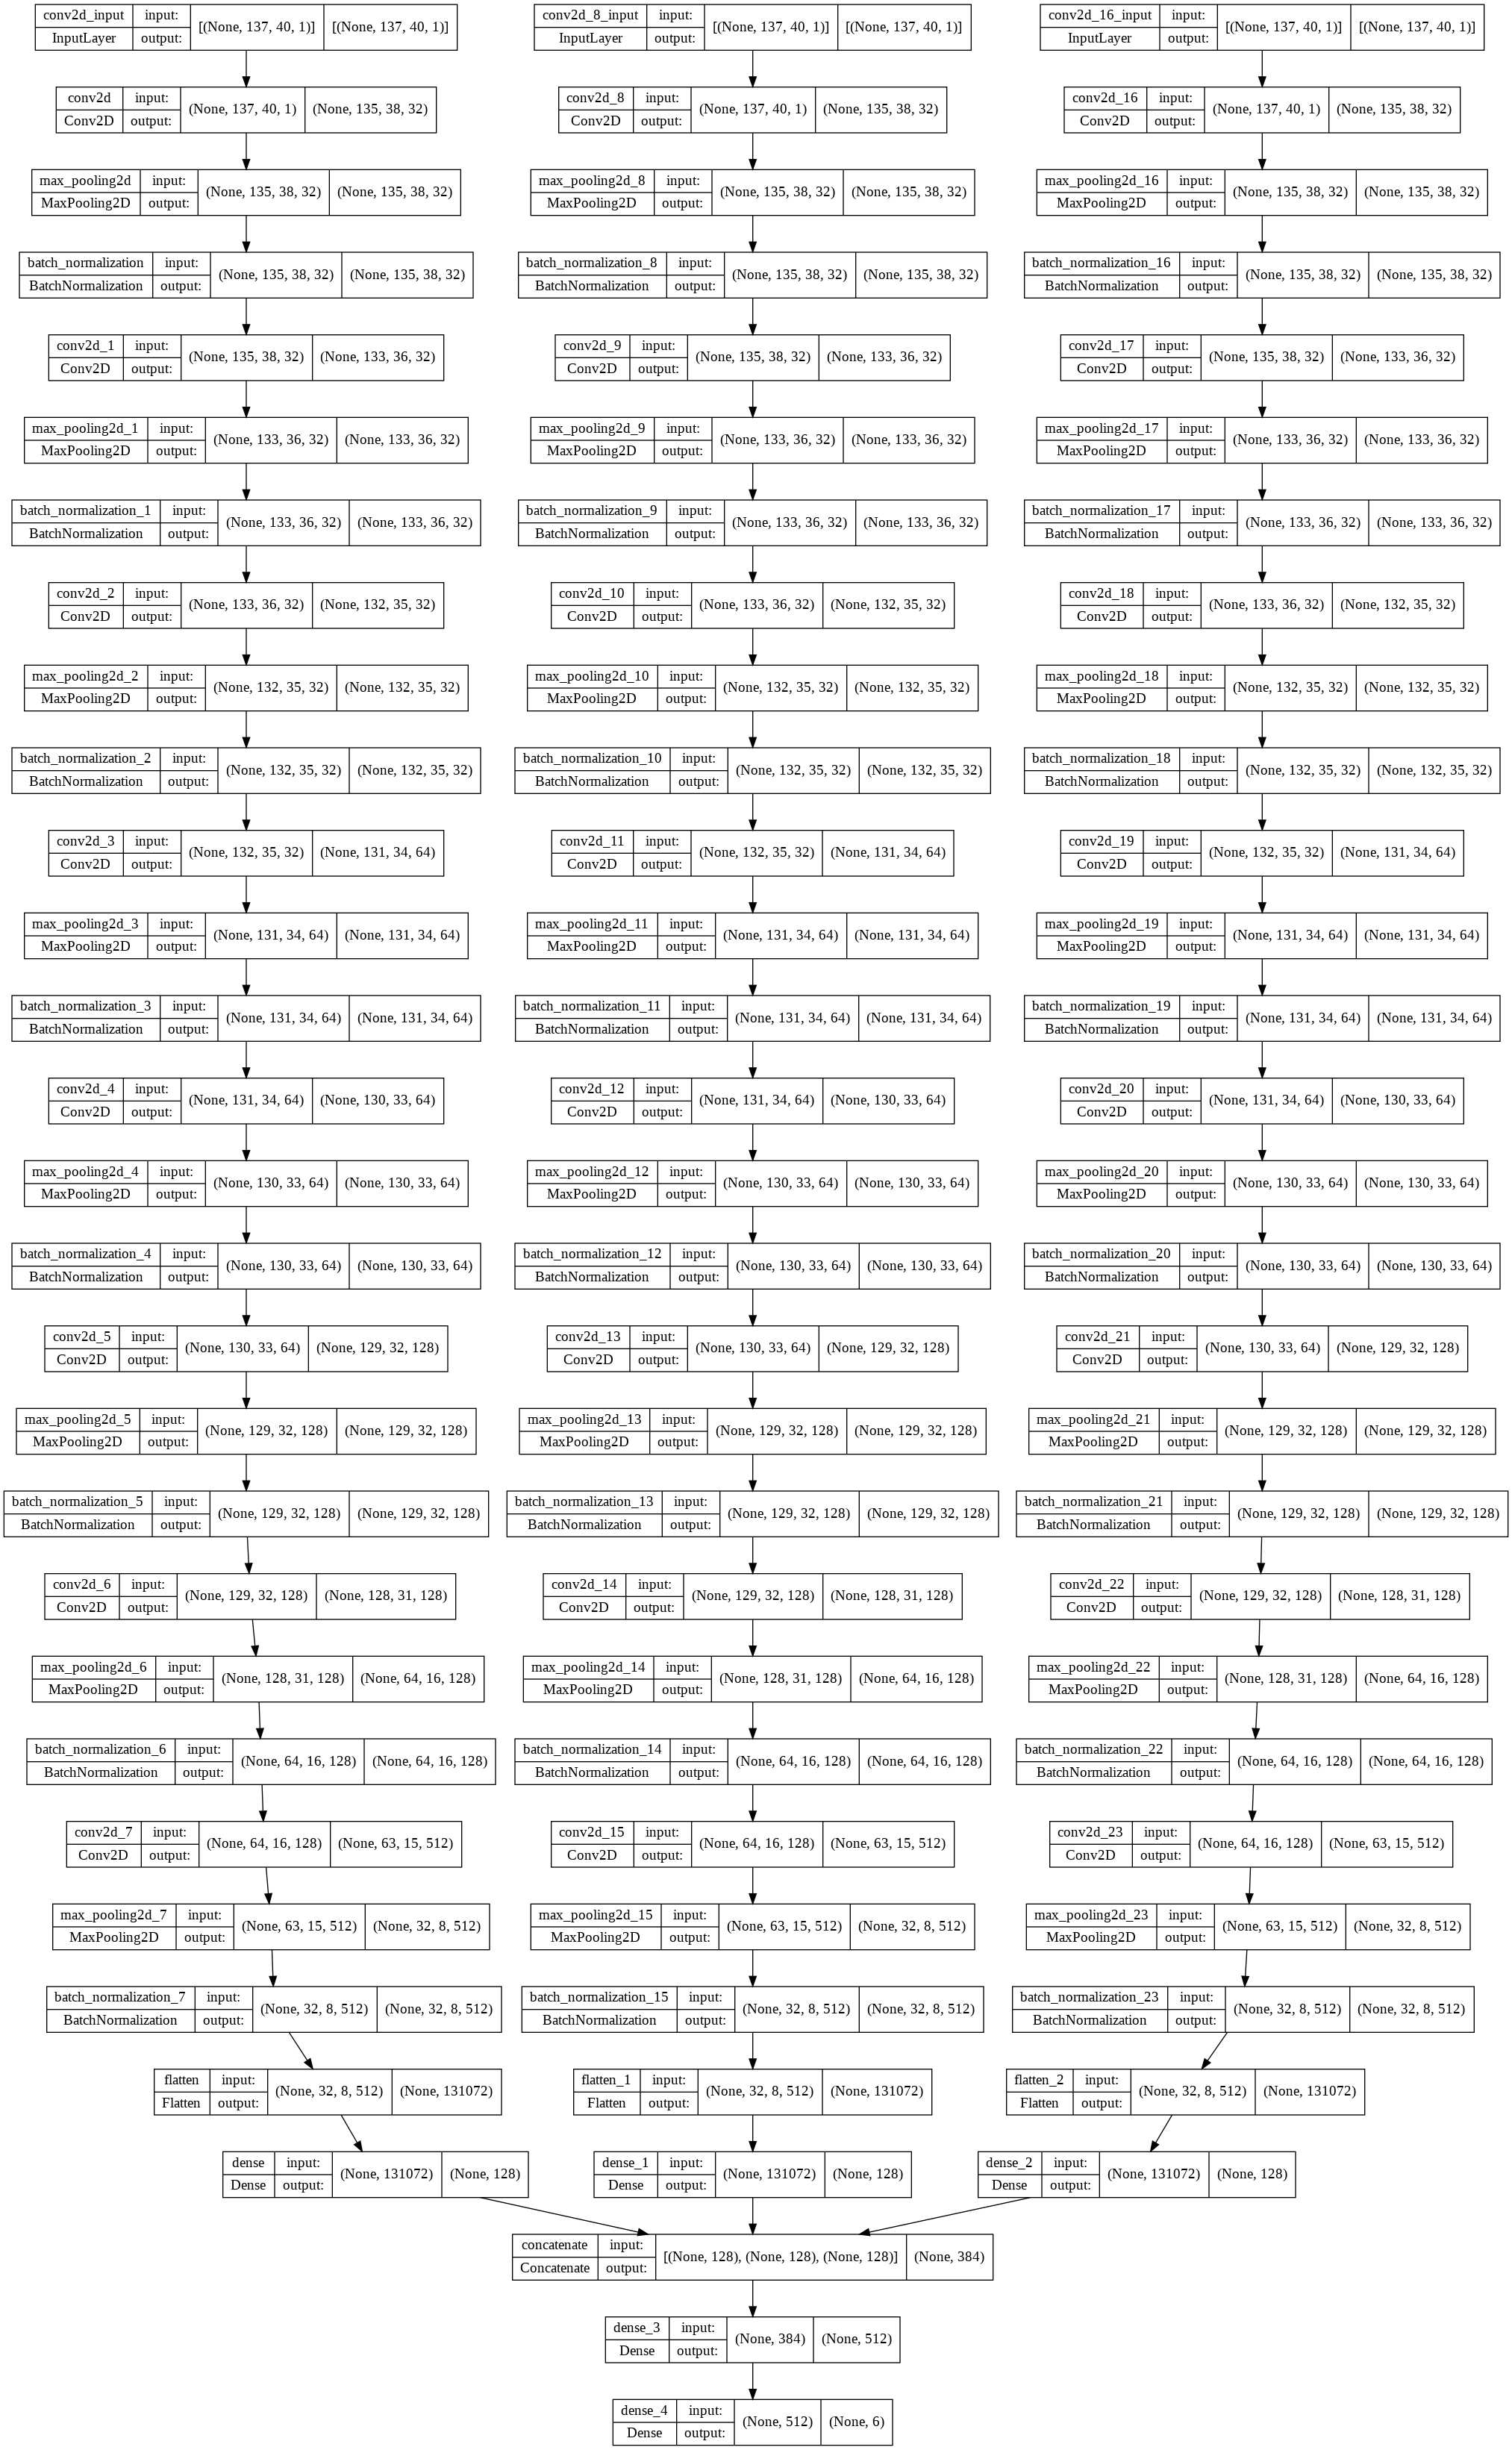

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/Shareddrives/Shared with Raiyan/Final/model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
X_train[2].shape

(3840, 137, 40, 1)

Epoch 1/30
188/188 [==============================] - 54s 289ms/step - loss: 0.0678 - accuracy: 0.9745
Epoch 2/30
188/188 [==============================] - 54s 287ms/step - loss: 0.0162 - accuracy: 0.9952
Epoch 3/30
188/188 [==============================] - 54s 288ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 4/30
188/188 [==============================] - 54s 288ms/step - loss: 6.5823e-04 - accuracy: 1.0000
Epoch 5/30
188/188 [==============================] - 54s 288ms/step - loss: 2.2388e-04 - accuracy: 1.0000
Epoch 6/30
188/188 [==============================] - 54s 288ms/step - loss: 1.7346e-04 - accuracy: 1.0000
Epoch 7/30
188/188 [==============================] - 54s 288ms/step - loss: 1.2410e-04 - accuracy: 1.0000
Epoch 8/30
188/188 [==============================] - 54s 287ms/step - loss: 9.9882e-05 - accuracy: 1.0000
Epoch 9/30
188/188 [==============================] - 54s 288ms/step - loss: 9.1435e-05 - accuracy: 1.0000
Epoch 10/30
188/188 [============================

KeyError: ignored

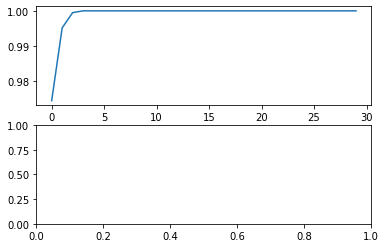

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="/content/drive/Shareddrives/Shared with Raiyan/Final/model.hdf5", 
                               verbose=1, save_best_only=True)

# train model
history = model.fit(x=X_train, y=y_train, callbacks=[checkpointer], batch_size=32, epochs=30)

# plot accuracy/error for training and validation
# plot_history(history)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
model.save("/content/drive/Shareddrives/Shared with Raiyan/Final/model_after_completion.hdf5")

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/Shareddrives/Final/model_after_completion.hdf5')

In [ ]:
model.summary()

In [ ]:
X

In [ ]:
from sklearn import metrics

y_pred = np.argmax(model.predict(X_test), axis=1)

confusion_metrics=metrics.classification_report(y_test, y_pred)
print(confusion_metrics)

f = open("/content/drive/Shareddrives/Shared with Raiyan/Final/classification_report.txt", "w")
f.write(confusion_metrics)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1500
           1       0.84      0.93      0.88      1500
           2       0.78      0.86      0.82      1500
           3       0.93      0.99      0.96      1500
           4       0.84      1.00      0.91      1500
           5       0.92      0.49      0.64      1500

    accuracy                           0.88      9000
   macro avg       0.88      0.88      0.87      9000
weighted avg       0.88      0.88      0.87      9000



542

In [ ]:
y_pred = np.argmax(model.predict(X_test_Noisy), axis=1)

confusion_metrics=metrics.classification_report(y_test_Noisy, y_pred)
print(confusion_metrics)

f = open("/content/drive/Shareddrives/Shared with Raiyan/Final/classification_report_Noisy.txt", "w")
f.write(confusion_metrics)

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1500
           1       0.77      0.96      0.85      1500
           2       0.96      0.71      0.82      1500
           3       0.96      0.92      0.94      1500
           4       0.79      1.00      0.88      1500
           5       0.63      0.65      0.64      1500

    accuracy                           0.83      9000
   macro avg       0.85      0.83      0.83      9000
weighted avg       0.85      0.83      0.83      9000



542

In [ ]:
f = open("/content/drive/Shareddrives/Shared with Raiyan/Final/classification_report_noisy.txt", "w")
f.write(confusion_metrics)

542

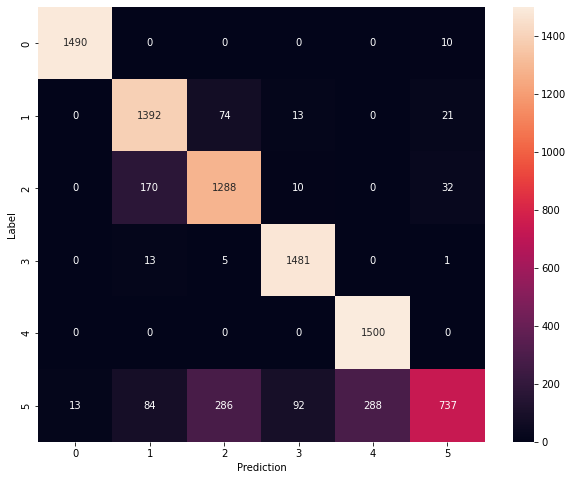

In [ ]:
import tensorflow as tf
import seaborn as sns

# y_pred = np.argmax(model.predict(X), axis=1)
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            annot=True, fmt='g')

plt.xlabel('Prediction')
plt.ylabel('Label')
plt.savefig('/content/drive/Shareddrives/Shared with Raiyan/Final/confusionMat.jpeg')
plt.show()

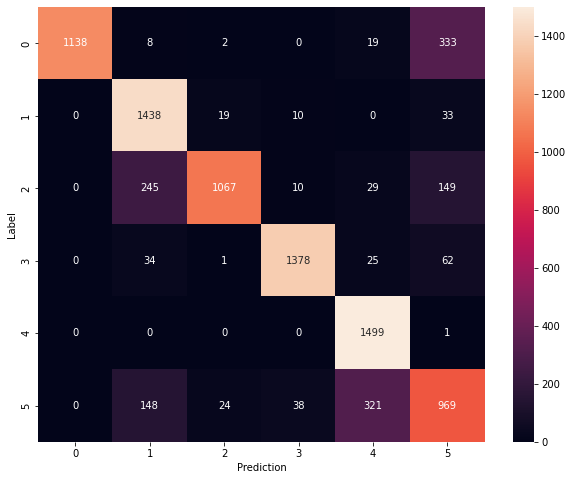

In [ ]:
import tensorflow as tf
import seaborn as sns

# y_pred = np.argmax(model.predict(X), axis=1)
confusion_mtx = tf.math.confusion_matrix(y_test_Noisy, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            annot=True, fmt='g')

plt.xlabel('Prediction')
plt.ylabel('Label')
plt.savefig('/content/drive/Shareddrives/Shared with Raiyan/Final/confusionMat_Noisy.jpeg')
plt.show()

In [ ]:
def predict_CNN(file_name):
  audio, sample_rate = resample(file_name)
  start = 0
  no_of_samples = 70000
  flag = 1
  val = [0 for i in range(6)]
  count = 0
  while(start + no_of_samples <= len(audio) and count < 2):
    data = features_extractor(file_name, start, start+no_of_samples)
    features = []
    features.append(data.tolist())
    X_pred = np.array(features)
    pred = model.predict(X_pred)
    pred_index = np.argmax(pred, axis=1)
    val[int(pred_index)] += 1
    start += no_of_samples
    count += 1
  res = 5
  mx = 0
  for i in range(6):
    if mx < val[i]:
        mx = val[i]
        res = i
    elif mx != 0 and mx == val[i]:
        res = 5
        break
  return res 

In [ ]:
flnam = []
fllab = []
for index_num, row in tqdm(eval_labels.iterrows()):
    filename = os.path.join(os.path.abspath(eval_path),str(row["track"]))
    flnam.append(row["track"])
    res = predict_CNN(filename)
    res = int(res)
    fllab.append(res)

In [ ]:
import csv
ans = open("part1_scores.txt", 'w')
for i in range(9000):
  ans.write(flnam[i])
  ans.write(', ')
  ans.write(str(fllab[i]))
  ans.write('\n')

In [ ]:
flnam = []
fllab = []
for index_num, row in tqdm(eval_labels2.iterrows()):
    filename = os.path.join(os.path.abspath(eval_path2),str(row["track"]))
    flnam.append(row["track"])
    res = predict_CNN(filename)
    res = int(res)
    fllab.append(res)

In [ ]:
ans = open("part1_scores.txt", 'w')
for i in range(9000):
  ans.write(flnam[i])
  ans.write(', ')
  ans.write(str(fllab[i]))
  ans.write('\n')